## Importing All Required Libraries

In [11]:
! pip install scikit-learn pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


## Loading Data Set & Discriptive Analysis

In [5]:
import pandas as pd
df=pd.read_csv('Data/student_scores.csv')
print(df.head())
print(df.describe())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


## Exploratory Data Analysis

In [13]:

print(df.info())


print(df.describe())


print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Hours     0
Scores    0
dtype: int64


## Visualizing The RelationShip Between hourse and Scores

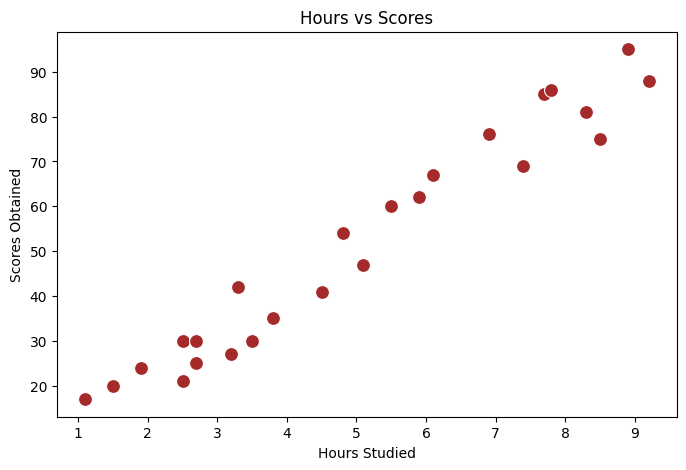

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours', y='Scores', data=df, color='brown', s=100)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

## preparing Data For the Model

In [23]:
x = df[['Hours']]
y = df['Scores']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Training The Model


In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Making predictions

In [25]:
y_pred = model.predict(x_test)

# Compare Actual vs Predicted

In [26]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


# Evaluating the Model

In [27]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 18.943211722315272
R^2 Score: 0.9678055545167994


# Visualizing Regression Line


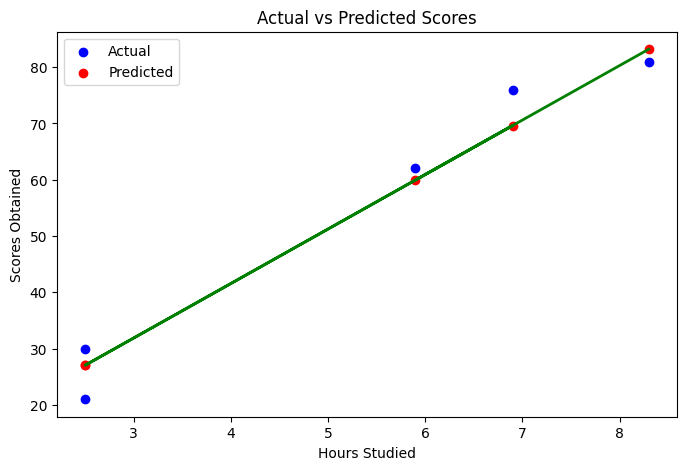

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.plot(x_test, y_pred, color='green', linewidth=2)    
plt.title('Actual vs Predicted Scores')
plt.xlabel('Hours Studied') 
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()

# Saving the Model

In [31]:
import joblib
joblib.dump(model, 'student_performance_model.pkl') 
print ("Model saved as 'student_performance_model.pkl'")

Model saved as 'student_performance_model.pkl'
